# 1. Thông tin dữ liệu

In [76]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pymannkendall import original_test

from dataflow import df_train, df_test, df_geography, df_product
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   Year       901561 non-null  int32         
 7   City       901561 non-null  object        
 8   State      901561 non-null  object        
 9   Region     901561 non-null  object        
 10  District   901561 non-null  object        
 11  Category   901561 non-null  object        
 12  Segment    901561 non-null  object        
 13  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(7)
memory usage: 92.9+ MB


In [78]:
df.head()

,ProductID,Date,Zip,Units,Revenue,COGS,Year,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,2013,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,2014,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,2013,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,2018,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,2013,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


# 2. Phân loại

## 2.1 Phân cụm dựa trên tổng doanh thu

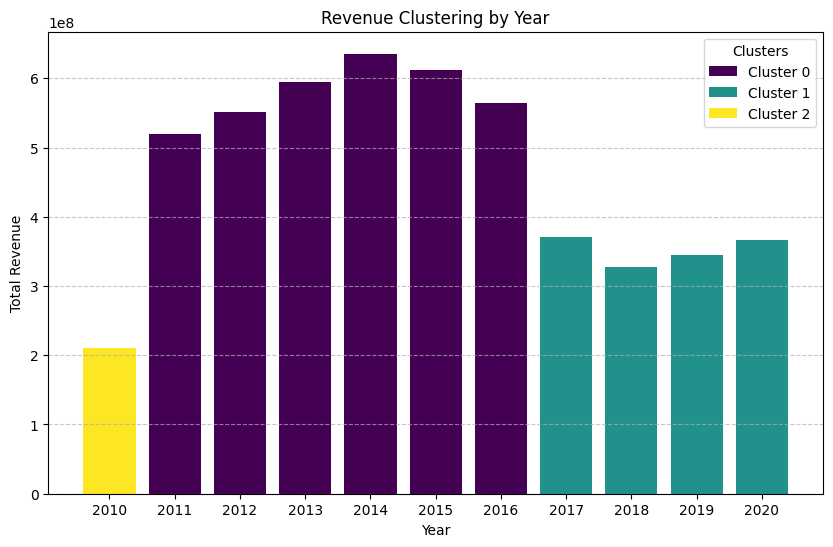

,Year,Revenue,Cluster
0,2010,2.104365e+08,2
1,2011,5.199015e+08,0
2,2012,5.508145e+08,0
3,2013,5.942496e+08,0
4,2014,6.356110e+08,0
5,2015,6.124530e+08,0
6,2016,5.640998e+08,0
7,2017,3.704278e+08,1
8,2018,3.272709e+08,1
9,2019,3.453526e+08,1


In [ ]:
# Re-load necessary libraries after execution reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Extract year from Date
df_train["Year"] = df_train["Date"].dt.year

# Group data by Year and sum Revenue
df_revenue = df_train.groupby("Year")["Revenue"].sum().reset_index()

# Normalize Revenue
scaler = StandardScaler()
df_revenue["Revenue_Scaled"] = scaler.fit_transform(df_revenue[["Revenue"]])

# Apply K-Means Clustering
best_k = 3   # Optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_revenue["Cluster"] = kmeans.fit_predict(df_revenue[["Revenue_Scaled"]])

# Plot the clustering results
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, best_k))

for cluster in range(best_k):
    subset = df_revenue[df_revenue["Cluster"] == cluster]
    plt.bar(subset["Year"], subset["Revenue"], color=colors[cluster], label=f"Cluster {cluster}")

plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Revenue Clustering by Year")
plt.legend(title="Clusters")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(df_revenue["Year"])
plt.show()

# Display the clustering results
df_revenue[["Year", "Revenue", "Cluster"]]


### Nhận xét:

#### Xu hướng doanh thu theo từng năm:

Biểu đồ hiển thị tổng doanh thu theo từng năm và phân cụm dữ liệu thành ba nhóm màu sắc khác nhau:

🟣 Cluster 0 (Màu tím đậm): Giai đoạn 2011-2016 có doanh thu cao nhất.

🟦 Cluster 1 (Màu xanh lam): Giai đoạn 2017-2020 có doanh thu thấp hơn.

🟡 Cluster 2 (Màu vàng): Chỉ xuất hiện vào năm 2010 với doanh thu thấp hơn so với các năm khác, cho thấy sự suy giảm liên tục trong những năm gần đây.

#### Sự thay đổi cụm doanh thu:

- Từ 2010-2016: Doanh thu biến động mạnh, xen kẽ giữa Cluster 2 và Cluster 0, cho thấy có sự tăng trưởng nhưng không ổn định.
- Sau 2016: Doanh thu giảm mạnh, rơi xuống Cluster 1, chứng tỏ sự suy giảm trong kinh doanh, có thể do thay đổi xu hướng thời trang, cạnh tranh mạnh hơn hoặc sự kiện kinh tế ảnh hưởng đến sức mua (dịch bệnh, mua bán online,...)

#### Chiến lược đầu tư dựa trên xu hướng doanh thu:

1. Điều tra nguyên nhân suy giảm doanh thu (2017 - 2020)
- Phân tích yếu tố ảnh hưởng:
- Có phải do thay đổi hành vi tiêu dùng? (Khách hàng giảm chi tiêu vào thời trang?).
- Cạnh tranh từ đối thủ mới? (Các thương hiệu mới nổi, sự thay đổi kênh phân phối từ cửa hàng vật lý sang online?).
- Ảnh hưởng từ xu hướng thị trường? (Thời trang bền vững, sự thay đổi phong cách?).

Giải pháp:

- Thực hiện khảo sát khách hàng, nghiên cứu thị trường để xác định vấn đề chính.
- Cải thiện chiến lược quảng cáo & tiếp thị, tập trung vào kênh online và thương mại điện tử.

2. Tận dụng giai đoạn doanh thu cao (2013 - 2016) để tái thiết lập mô hình kinh doanh
- Những năm này, doanh thu đạt đỉnh => Cần phân tích:
- Kênh phân phối: Cửa hàng offline có phải là kênh chính? Hay có chiến dịch bán hàng đặc biệt?
- Sản phẩm bán chạy: Nhóm sản phẩm nào có doanh thu cao nhất? Có thể tái sản xuất hoặc tối ưu danh mục sản phẩm.
- Đối tượng khách hàng: Đối tượng nào chiếm phần lớn doanh thu? Có thể mở rộng thêm hay đã thay đổi hành vi?

3. Đầu tư vào đổi mới sản phẩm và xu hướng mới
- Mở rộng danh mục sản phẩm: Đưa thêm dòng sản phẩm mới phù hợp với nhu cầu hiện tại.
- Chuyển dịch sang thương mại điện tử: Nếu xu hướng bán hàng online đang tăng, hãy đầu tư vào nền tảng trực tuyến.
- Tập trung vào cá nhân hóa: Ứng dụng AI để phân tích hành vi mua sắm và đề xuất sản phẩm phù hợp.

4. Chiến lược tài chính
- Giai đoạn 2021+: Nếu xu hướng doanh thu tiếp tục giảm, cần đánh giá lại cửa hàng có doanh số thấp để tối ưu chi phí vận hành.
- Tái phân bổ ngân sách: Đầu tư mạnh hơn vào các kênh bán hàng hiệu quả thay vì giữ mô hình truyền thống.

## Thuật toán tìm số cụm k tối ưu để phân cụm dữ liệu

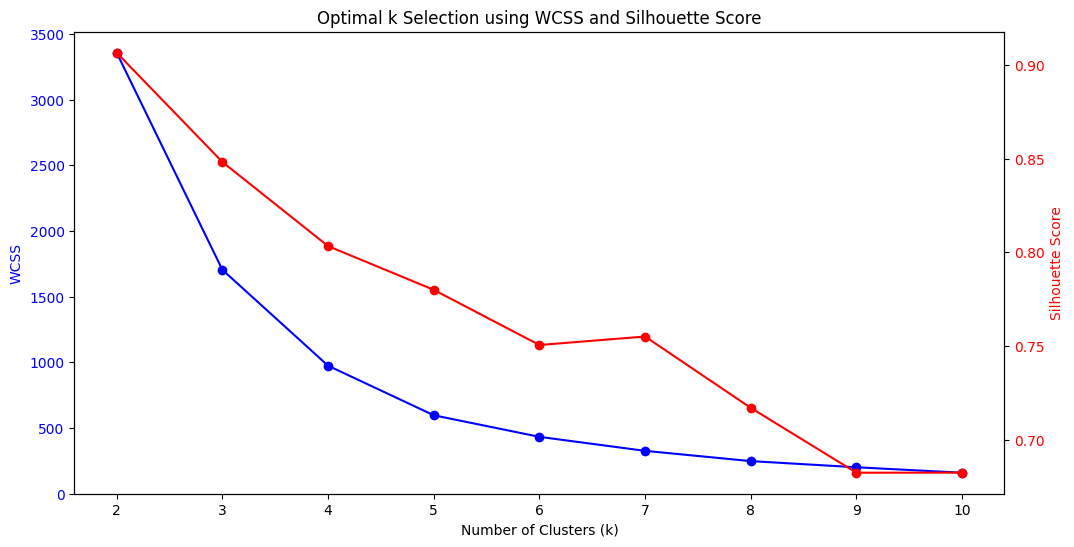

Số cụm tối ưu:  8


In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

def optimal_k_selection(data, max_k=10):
    """
    Xác định số cụm k tối ưu bằng cách tối thiểu hóa phương sai chênh lệch và 
    kì vọng chênh lệch giữa các cluster.
    
    Parameters:
    - data: Dữ liệu đã được chuẩn hóa để thực hiện clustering.
    - max_k: Giá trị lớn nhất của k cần kiểm tra.
    
    Returns:
    - optimal_k: Số cụm k tối ưu.
    - results: Danh sách chứa thông tin về phương sai chênh lệch và chỉ số silhouette.
    """
    wcss = []  # Tổng phương sai trong mỗi cụm (WCSS - Within Cluster Sum of Squares)
    silhouette_scores = []  # Chỉ số silhouette
    distance_variance = []  # Phương sai của khoảng cách giữa các điểm trong cụm

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        cluster_centers = kmeans.cluster_centers_
        
        # Tính WCSS
        wcss.append(kmeans.inertia_)

        # Tính silhouette score
        silhouette_scores.append(silhouette_score(data, labels))

        # Tính phương sai chênh lệch khoảng cách giữa các điểm trong cùng cụm
        distances = np.min(cdist(data, cluster_centers, 'euclidean'), axis=1)
        distance_variance.append(np.var(distances))

    # Tính toán sự thay đổi của WCSS và phương sai khoảng cách
    wcss_diff = np.diff(wcss, 2)  # Đạo hàm bậc 2 để tìm điểm gãy
    variance_diff = np.diff(distance_variance, 2)

    # Chuẩn hóa các giá trị để so sánh dễ dàng
    wcss_norm = (wcss_diff - np.min(wcss_diff)) / (np.max(wcss_diff) - np.min(wcss_diff))
    variance_norm = (variance_diff - np.min(variance_diff)) / (np.max(variance_diff) - np.min(variance_diff))

    # Xác định k tối ưu bằng cách tìm giá trị nhỏ nhất của tổng phương sai chênh lệch và kì vọng chênh lệch
    total_deviation = wcss_norm + variance_norm
    optimal_k = np.argmin(total_deviation) + 2  # Cộng thêm 2 vì mảng bắt đầu từ k=2

    # Kết quả tổng hợp
    results = {
        "k_values": list(range(2, max_k + 1)),
        "WCSS": wcss,
        "Silhouette Score": silhouette_scores,
        "Distance Variance": distance_variance,
        "Optimal k": optimal_k
    }

    return optimal_k, results

# Chạy thuật toán trên dữ liệu đã chuẩn hóa
optimal_k, results = optimal_k_selection(df_kmeans_scaled, max_k=10)

# Vẽ biểu đồ kết quả
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ WCSS và Silhouette Score
ax1.plot(results["k_values"], results["WCSS"], 'bo-', label="WCSS")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("WCSS", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(results["k_values"], results["Silhouette Score"], 'ro-', label="Silhouette Score")
ax2.set_ylabel("Silhouette Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Optimal k Selection using WCSS and Silhouette Score")
plt.show()

print("Số cụm tối ưu: ", optimal_k)


## 2.2 Phân cụm sản phẩm dựa trên tổng doanh thu

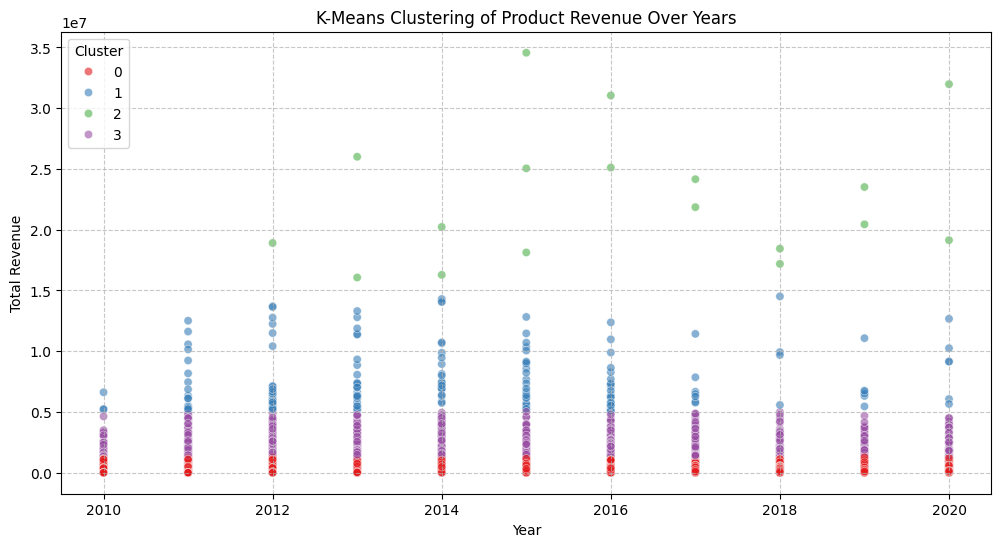

Cluster
0    7069
3     780
1     157
2      18
Name: count, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Nhóm dữ liệu theo ProductID và Year để tổng hợp doanh thu
df["Year"] = pd.to_datetime(df["Date"]).dt.year

df_kmeans = df.groupby(["ProductID", "Year"], as_index=False).agg({
    "Revenue": "sum"  # Tổng doanh thu của từng sản phẩm qua các năm
}).dropna()

# Chuẩn hóa dữ liệu để cải thiện clustering
scaler = StandardScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans[["Revenue"]])

# Chọn số cụm k bằng phương pháp Elbow để tìm giá trị tối ưu
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_kmeans_scaled)
    wcss.append(kmeans.inertia_)


# Áp dụng K-Means với k tối ưu
optimal_k = optimal_k_selection(df_kmeans_scaled, max_k=10)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_kmeans["Cluster"] = kmeans.fit_predict(df_kmeans_scaled)

# Vẽ biểu đồ để quan sát phân cụm theo doanh thu qua các năm
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_kmeans, x="Year", y="Revenue", hue="Cluster", palette="Set1", alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("K-Means Clustering of Product Revenue Over Years")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Kiểm tra số lượng sản phẩm trong mỗi cụm
df_kmeans["Cluster"].value_counts()


### Nhận xét

🔍 1. Xu hướng doanh thu theo năm:

Biểu đồ thể hiện phân cụm sản phẩm theo doanh thu qua các năm từ 2010 - 2020.
Có 4 cụm chính được phân loại dựa trên doanh thu:

🟦 Cluster 0 (Xanh đậm) – Doanh thu thấp nhất.

🟪 Cluster 1 (Tím nhạt) – Doanh thu trung bình.

🟠 Cluster 2 (Cam nhạt) – Doanh thu khá cao.

🟡 Cluster 3 (Vàng) – Doanh thu cao nhất.

💹 2. Sự phân bố doanh thu theo cụm:

- Phần lớn sản phẩm thuộc Cluster 0 và Cluster 1, cho thấy nhiều sản phẩm có doanh thu thấp hoặc trung bình.
- Cluster 3 có số lượng sản phẩm ít nhưng có mức doanh thu rất cao, điều này chứng tỏ một số sản phẩm chủ lực mang lại phần lớn doanh thu.
- Số điểm vàng (Cluster 3) xuất hiện không đồng đều theo thời gian, đặc biệt có các giai đoạn cao điểm vào 2014, 2016, 2018 và giảm vào những năm cuối.

📉 3. Dấu hiệu suy giảm doanh thu:

- Giai đoạn 2010 - 2016: Xu hướng tăng trưởng, có nhiều sản phẩm đạt mức doanh thu cao.
- Giai đoạn 2017 - 2020: Sự suy giảm nhẹ, ít sản phẩm thuộc Cluster 3 hơn, cho thấy có thể doanh số đang phân tán hoặc thị trường có sự thay đổi.

#### Chiến lược đầu tư dựa trên xu hướng doanh thu

- Tăng cường đầu tư vào nhóm sản phẩm Cluster 3 (màu vàng)

🥇 Đây là những sản phẩm chủ lực có doanh thu cao, cần tập trung duy trì.
📊 Phân tích kỹ các sản phẩm thuộc nhóm này để xác định yếu tố thành công (ví dụ: thương hiệu, mẫu mã, chiến lược quảng bá).
🚀 Đầu tư vào marketing mạnh hơn cho các sản phẩm này để kéo dài vòng đời sản phẩm.

- Cải thiện hiệu suất nhóm Cluster 1 và Cluster 2 (tím và cam)

🔄 Tìm kiếm tiềm năng tăng trưởng: Những sản phẩm có doanh thu trung bình có thể đẩy lên nhóm cao hơn bằng cách cải thiện chất lượng, đổi mới mẫu mã hoặc tối ưu giá bán.
🎯 Tập trung vào các sản phẩm có doanh thu ổn định trong thời gian dài để phát triển bền vững.

- Loại bỏ hoặc tái cấu trúc sản phẩm trong Cluster 0 (xanh đậm)

🛑 Sản phẩm có doanh thu thấp kéo dài có thể không phù hợp với thị trường, cần cân nhắc loại bỏ hoặc thay thế.
🔄 Nếu một số sản phẩm có tiềm năng nhưng chưa đạt doanh thu cao, có thể tái định vị sản phẩm, thay đổi chiến dịch quảng cáo, hoặc đưa vào chương trình giảm giá kích cầu.

- Xây dựng chiến lược theo chu kỳ kinh doanh

📆 Nhìn vào các năm có nhiều sản phẩm đạt Cluster 3 (2014, 2016, 2018), có thể đây là thời kỳ cao điểm của ngành thời trang.
🔍 Cần kiểm tra yếu tố tác động như mùa bán hàng, xu hướng tiêu dùng, sự kiện lớn, từ đó lên kế hoạch sản xuất và marketing hiệu quả hơn.

## 2.3 Phân loại sản phẩm theo số lượng bán ra

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


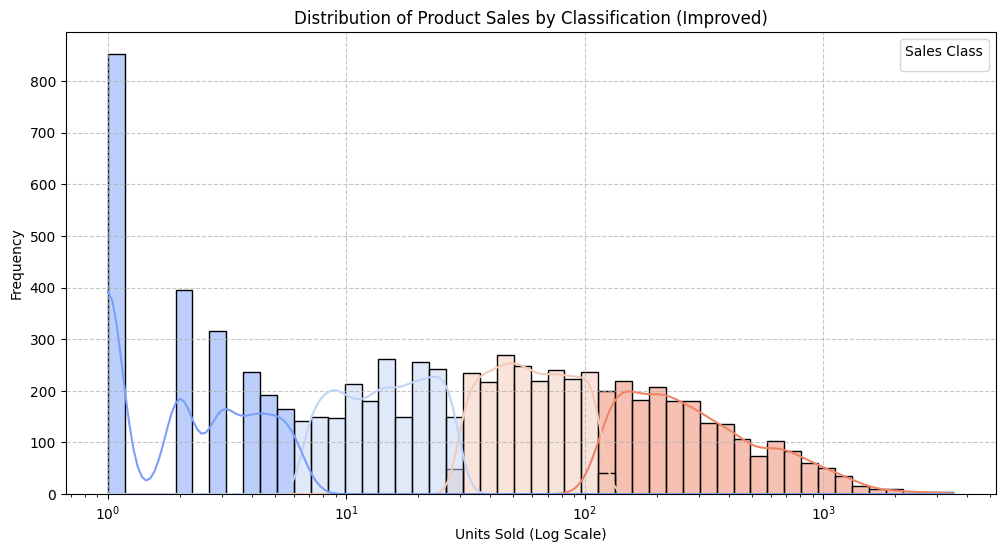

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')

from dataflow import df_train, df_test, df_geography, df_product
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


# Trích xuất năm từ Date
df_train["Year"] = df_train["Date"].dt.year

# Nhóm dữ liệu theo ProductID và Year, tính tổng số lượng bán (Units)
df_grouped = df_train.groupby(["Year", "ProductID"])["Units"].sum().reset_index()

# Chuẩn bị dữ liệu cho mô hình phân loại
df_grouped["Units_Class"] = pd.qcut(df_grouped["Units"], q=4, labels=[0, 1, 2, 3])  # Chia thành 4 nhóm

# Chia dữ liệu train-test
X = df_grouped[["Year"]]
y = df_grouped["Units_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForest để phân loại
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



    # Vẽ biểu đồ phân phối Units theo các lớp với cải tiến
plt.figure(figsize=(12, 6))
sns.histplot(df_grouped, x="Units", hue="Units_Class", bins=50, palette="coolwarm", kde=True, log_scale=True)
plt.xlabel("Units Sold (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Product Sales by Classification (Improved)")
plt.legend(title="Sales Class")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()



### Nhận xét:

#### 🔍 1. Phân bố sản phẩm theo số lượng bán ra (Log Scale):

- Biểu đồ hiển thị phân phối số lượng sản phẩm bán ra theo trục logarit.
- Có hai nhóm màu sắc chính đại diện cho hai phân loại sản phẩm:

🔵 Sản phẩm bán ít (màu xanh nhạt - bên trái).

🔴 Sản phẩm bán chạy (màu đỏ nhạt - bên phải).

#### 💡 2. Đặc điểm chính của phân phối doanh số:

- Rất nhiều sản phẩm bán rất ít (bên trái, dưới 10 đơn vị).
- Sản phẩm bán trung bình (từ 10 - 100 đơn vị) có số lượng lớn, nhưng không phải tất cả đều tiềm năng.
- Sản phẩm bán chạy (trên 100 - 1000+ đơn vị) có số lượng ít, nhưng chiếm phần lớn doanh thu.

#### 📉 3. Dấu hiệu quan trọng cần chú ý:

- Hiệu ứng "Long Tail" rõ rệt: Có rất nhiều sản phẩm bán rất ít, trong khi một số ít sản phẩm bán cực kỳ mạnh.
- Phân phối không đối xứng, nghiêng về phía các sản phẩm có doanh số thấp hơn.
- Có sự tách biệt rõ ràng giữa nhóm sản phẩm bán chạy và nhóm kém hiệu quả, điều này giúp dễ dàng ra quyết định đầu tư.

### Chiến lược đầu tư dựa trên dữ liệu
#### ✅ 1. Đầu tư mạnh vào nhóm sản phẩm bán chạy (bên phải, màu đỏ nhạt) 🚀

- Tập trung vào các sản phẩm thuộc nhóm top bán chạy để tối đa hóa doanh thu.
- Tăng cường quảng bá, tối ưu nguồn cung & mở rộng thị trường cho những sản phẩm này.
- Xây dựng chương trình khuyến mãi, upsell & cross-sell để tận dụng lợi thế bán hàng.

#### ✅ 2. Kiểm tra lại nhóm sản phẩm bán ít (bên trái, màu xanh nhạt) 🔍

- Cắt giảm hoặc điều chỉnh danh mục sản phẩm có doanh số kém để tối ưu nguồn lực.
- Cải tiến hoặc thay đổi chiến lược marketing cho những sản phẩm có tiềm năng nhưng chưa bán chạy.
- Tận dụng AI để phân tích nguyên nhân doanh số thấp (giá cả, thị hiếu khách hàng, chất lượng sản phẩm?).

#### ✅ 3. Tạo chiến lược thúc đẩy nhóm sản phẩm có doanh số trung bình 🏗

- Nếu một số sản phẩm nằm giữa nhóm bán ít và bán chạy, có thể đầu tư để đẩy lên nhóm cao hơn.
- Chạy chiến dịch quảng bá thử nghiệm để kiểm tra mức độ phản ứng của khách hàng.
- Điều chỉnh giá hoặc gói sản phẩm để thu hút nhiều người mua hơn.

## 2.4 Phân cụm cửa hàng dựa trên số lượng sản phẩm bán ra

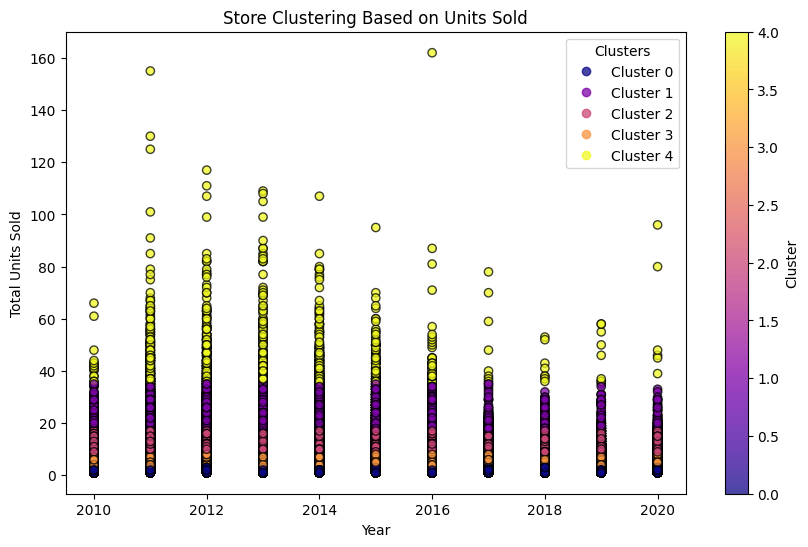

In [69]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from dataflow import df_train, df_test, df_geography, df_product
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Extract Year from Date
df_train["Year"] = df_train["Date"].dt.year

# Aggregate sales data by Zip (Store) and Year
df_store_sales = df_train.groupby(["Zip", "Year"]).agg({"Units": "sum", "Revenue": "sum"}).reset_index()

# Normalize the "Units" column
scaler = StandardScaler()
df_store_sales["Units_Scaled"] = scaler.fit_transform(df_store_sales[["Units"]])

# Apply K-Means clustering
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_store_sales["Cluster"] = kmeans.fit_predict(df_store_sales[["Units_Scaled"]])

# Plot clustering results with appropriate colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_store_sales["Year"], df_store_sales["Units"], c=df_store_sales["Cluster"], cmap="plasma", alpha=0.75, edgecolors="k")
plt.xlabel("Year")
plt.ylabel("Total Units Sold")
plt.title("Store Clustering Based on Units Sold")
plt.colorbar(scatter, label="Cluster")

# Add cluster legend
legend_labels = [f"Cluster {i}" for i in range(num_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.show()



#### 🔍 1. Xu hướng số lượng sản phẩm bán ra theo năm:

Biểu đồ thể hiện phân cụm cửa hàng theo tổng số lượng sản phẩm bán ra từ 2010 - 2020.

Các cụm màu sắc đại diện cho các nhóm doanh số khác nhau:

🟦 Cluster 0 (Xanh đậm) – Doanh số thấp nhất.

🟪 Cluster 1 (Tím nhạt) – Doanh số trung bình thấp.

🟠 Cluster 2 (Cam nhạt) – Doanh số trung bình cao.

🔴 Cluster 3 (Đỏ nhạt) – Doanh số khá cao.

🟡 Cluster 4 (Vàng) – Doanh số cao nhất.

#### 💹 2. Phân bố số lượng bán ra theo cụm:

- Hầu hết các cửa hàng thuộc cụm Cluster 0 và Cluster 1 (màu xanh đậm và tím nhạt), chứng tỏ phần lớn các cửa hàng có doanh số thấp hoặc trung bình.

- Cụm Cluster 4 (vàng) chứa những cửa hàng có số lượng bán ra rất cao, nhưng số lượng điểm vàng này giảm dần theo thời gian.

- Giai đoạn 2010 - 2016 có nhiều điểm vàng hơn, cho thấy có nhiều cửa hàng bán được số lượng lớn sản phẩm trong thời gian này.

- Giai đoạn 2017 - 2020, số lượng điểm vàng giảm, có nghĩa là các cửa hàng bán chạy ngày càng ít.

#### 📉 3. Dấu hiệu suy giảm doanh số:

- 2010 - 2016: Xu hướng tăng trưởng, có nhiều cửa hàng đạt mức bán hàng cao (Cluster 4).

- 2017 - 2020: Sự suy giảm rõ rệt, ít cửa hàng đạt được số lượng bán ra cao, có thể do thay đổi thị trường, cạnh tranh mạnh hoặc xu hướng mua sắm thay đổi.


### Chiến lược đầu tư dựa trên xu hướng doanh số
#### ✅ 1. Duy trì & tối ưu các cửa hàng Cluster 4 (vàng - bán chạy nhất)

- Các cửa hàng này đóng góp phần lớn vào doanh thu, cần tập trung duy trì hiệu suất.
- Phân tích lý do thành công: vị trí địa lý, danh mục sản phẩm bán chạy, nhóm khách hàng chính.
- Áp dụng mô hình bán hàng của các cửa hàng này cho các khu vực khác có tiềm năng.

#### ✅ 2. Cải thiện nhóm Cluster 1 & Cluster 2 (tím, cam) để đẩy lên nhóm bán chạy hơn

- Những cửa hàng này có doanh số trung bình nhưng chưa đạt mức cao nhất.
- Cần các chương trình marketing, khuyến mãi, chiến lược giá để kích cầu.
- Tối ưu trải nghiệm khách hàng bằng cách cải thiện dịch vụ, mở rộng danh mục sản phẩm.

#### ✅ 3. Xác định nguyên nhân giảm doanh số sau 2016

    📉 Số lượng cửa hàng bán chạy (Cluster 4) giảm đáng kể => Cần điều tra nguyên nhân:
- Sự thay đổi hành vi tiêu dùng? (Chuyển từ mua sắm tại cửa hàng sang online?)
- Tăng cường cạnh tranh từ đối thủ? (Xuất hiện nhiều thương hiệu mới?)
- Giảm sự quan tâm đến một số sản phẩm nhất định?

#### ✅ 4. Điều chỉnh danh mục sản phẩm theo xu hướng tiêu dùng

- Tìm kiếm những dòng sản phẩm có xu hướng tăng trưởng và tập trung đầu tư vào chúng.
- Loại bỏ hoặc cải tiến các sản phẩm không còn phù hợp với nhu cầu thị trường.

## 2.5 Phân loại sản phẩm dựa theo Doanh thu

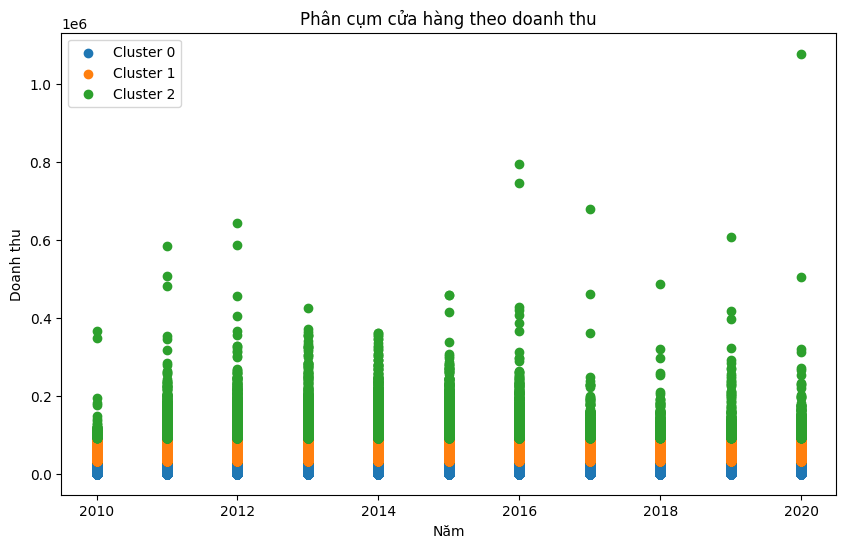

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from dataflow import df_train, df_test, df_geography, df_product
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


# Chuyển đổi cột Date thành Year để groupby
df_train['Year'] = df_train['Date'].dt.year

# Nhóm dữ liệu theo Year và Zip, tính tổng doanh thu
df_grouped = df_train.groupby(['Year', 'Zip'])['Revenue'].sum().reset_index()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_grouped_scaled = scaler.fit_transform(df_grouped[['Revenue']])

# Áp dụng thuật toán KMeans để phân cụm
num_clusters = 3  # Giả định chia thành 3 cụm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(df_grouped_scaled)

# Vẽ biểu đồ để trực quan hóa kết quả phân cụm
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df_grouped[df_grouped['Cluster'] == cluster]
    plt.scatter(cluster_data['Year'], cluster_data['Revenue'], label=f'Cluster {cluster}')

plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.title('Phân cụm cửa hàng theo doanh thu')
plt.legend()
plt.show()



### Nhận xét

#### Biểu đồ hiển thị 3 nhóm cửa hàng theo doanh thu:
- Cluster 0 (màu xanh dương - doanh thu thấp): Chiếm phần lớn, nằm sát trục hoành.
- Cluster 1 (màu cam - doanh thu trung bình): Xen kẽ giữa nhóm thấp và cao.
- Cluster 2 (màu xanh lá - doanh thu cao nhất): Rải rác ở mức doanh thu cao, cho thấy có một số cửa hàng có doanh thu vượt trội.

#### Doanh thu cao nhất trong các năm có sự biến động nhưng nhìn chung giữ ổn định.

#### Sự xuất hiện của các điểm dữ liệu ở mức doanh thu cao nhất ngày càng nhiều (Cluster 2), điều này có thể do:

- Mở rộng thị trường, gia tăng số lượng cửa hàng thành công.
- Các yếu tố bên ngoài như xu hướng thời trang, chính sách giá, chiến lược tiếp thị.
- Năm 2012 và 2016 có một số đỉnh bất thường, có thể là do:

    - Sự kiện bán hàng lớn (Black Friday, Giáng sinh…).
    - Cửa hàng mới nổi bật lên.
    - Các chiến dịch marketing thành công.

#### Chiến lược đầu tư dựa trên dữ liệu:

1. Đầu tư vào nhóm cửa hàng thuộc Cluster 2 (Doanh thu cao): Xác định các cửa hàng trong nhóm này và các đặc điểm chung của chúng:
    - Khu vực nào?
    - Danh mục sản phẩm nào bán chạy?
    - Khách hàng mục tiêu?
    - Mở rộng quy mô hoặc áp dụng mô hình kinh doanh của các cửa hàng này cho các khu vực khác.

2. Cải thiện hiệu suất nhóm Cluster 1 (Doanh thu trung bình)
    - Tìm ra lý do tại sao nhóm này chưa đạt được doanh thu cao:
    - Do vị trí?
    - Do giá cả?
    - Do chiến lược tiếp thị?
    - Đưa ra giải pháp tối ưu hoá hoạt động để tăng trưởng, chẳng hạn như khuyến mãi, cải thiện trải nghiệm khách hàng, hoặc thay đổi dòng sản phẩm.

3. Đánh giá lại nhóm Cluster 0 (Doanh thu thấp)

    - Nên đóng cửa hay cải thiện?
    - Phân tích xem cửa hàng nào trong nhóm này có tiềm năng để phát triển và nên được đầu tư thêm.
    - Nếu một cửa hàng liên tục có doanh thu thấp trong nhiều năm, có thể tái cơ cấu hoặc đóng cửa để tránh lỗ.   

## 2.6 Phân cụm dựa theo cả Doanh thu (Revenue) và Lợi nhuận biên (Profit Margin)

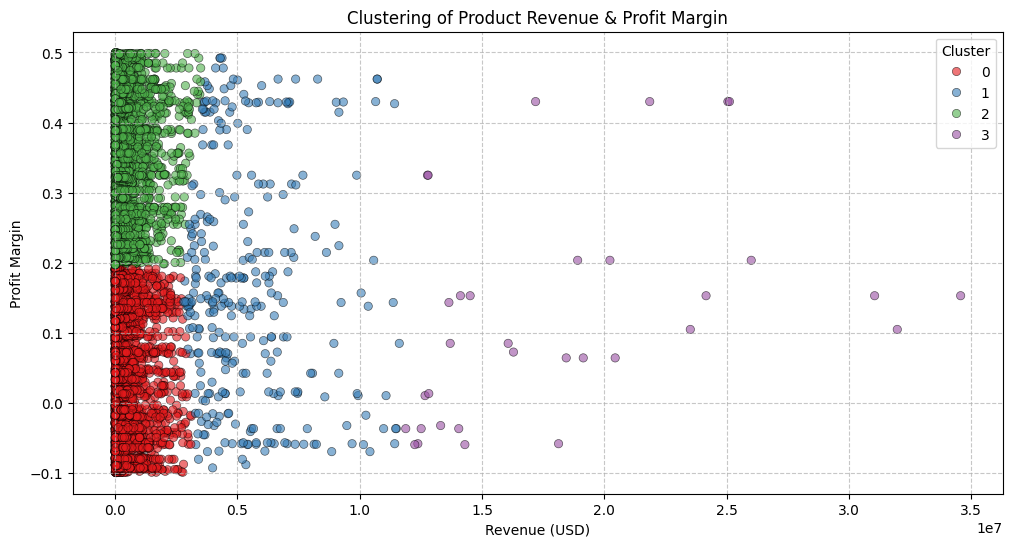

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')


# 🔹 **TÍNH TOÁN BIÊN LỢI NHUẬN**
df_sample["Profit_Margin"] = (df_sample["Revenue"] - df_sample["COGS"]) / df_sample["Revenue"]
df_sample = df_sample.dropna(subset=["Revenue", "Profit_Margin"])  # Xóa dữ liệu bị thiếu

# 🔹 **CHUẨN HÓA DỮ LIỆU**
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample[["Revenue", "Profit_Margin"]])

# 🔹 **CHẠY K-MEANS CLUSTERING**
best_k = 4  # Số cụm tối ưu
kmeans_combined = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_sample["Combined_Cluster"] = kmeans_combined.fit_predict(df_scaled)


bar_width = 0.4
x = np.arange(len(df_sample))

# Vẽ biểu đồ phân cụm trên mặt phẳng Revenue - Profit Margin
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sample, x="Revenue", y="Profit_Margin", hue="Combined_Cluster", palette="Set1", alpha=0.6, edgecolor="k")
plt.xlabel("Revenue (USD)")
plt.ylabel("Profit Margin")
plt.title(f"Clustering of Product Revenue & Profit Margin")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Nhận xét: 

##### 🔍 1️⃣ Phân bố của các cụm:

✔ Cluster 0 (Màu đỏ - Doanh thu thấp, lợi nhuận thấp):

- Các sản phẩm có doanh thu thấp (< 0.5 triệu USD) và biên lợi nhuận thấp hoặc âm (~0%).
- Đây có thể là các sản phẩm bán chậm hoặc không sinh lời, cần xem xét loại bỏ hoặc tối ưu chi phí sản xuất.

✔ Cluster 1 (Màu xanh dương - Doanh thu trung bình, lợi nhuận trung bình):

- Sản phẩm có doanh thu từ trung bình đến cao (0.5 - 1.5 triệu USD) và lợi nhuận ổn định.
- Đây là nhóm có tiềm năng tăng trưởng, có thể đầu tư vào quảng bá để tăng doanh số.

✔ Cluster 2 (Màu xanh lá - Doanh thu thấp, lợi nhuận cao):

- Doanh thu thấp nhưng biên lợi nhuận rất cao (30-50%).
- Nhóm này có thể là các sản phẩm niche (thị trường ngách) với tỷ suất lợi nhuận cao, cần mở rộng kênh bán hàng.

✔ Cluster 3 (Màu tím - Doanh thu cao, biến động lợi nhuận):

- Nhóm sản phẩm có doanh thu rất cao (> 1.5 triệu USD) nhưng lợi nhuận thay đổi mạnh.
- Đây có thể là các sản phẩm chủ lực, cần tối ưu hóa chi phí để cải thiện lợi nhuận bền vững.  

##### 🚀 2️⃣ Chiến lược kinh doanh gợi ý

✔ Đối với sản phẩm trong Cluster 0 (màu đỏ):

- Xem xét loại bỏ hoặc giảm tồn kho cho các sản phẩm có biên lợi nhuận âm.
- Đàm phán với nhà cung cấp để giảm chi phí đầu vào.
- Tái định vị sản phẩm hoặc điều chỉnh giá bán để tăng hấp dẫn.

✔ Đối với sản phẩm trong Cluster 1 (màu xanh dương)

- Đầu tư mạnh vào marketing để đẩy mạnh doanh số.
- Tăng cường phân phối và khuyến mãi để thu hút khách hàng.

✔ Đối với sản phẩm trong Cluster 2 (màu xanh lá)

- Tăng sản xuất và phân phối vì lợi nhuận rất cao.
- Tìm cách mở rộng ra các thị trường mới để khai thác tiềm năng lớn hơn.

✔ Đối với sản phẩm trong Cluster 3 (màu tím)

- Tối ưu hóa chi phí sản xuất để tăng lợi nhuận.
- Phân tích sâu về từng sản phẩm trong cụm để cải thiện hiệu suất bán hàng.

## 2.7 Phân cụm dựa trên doanh thu và số lượng bán ra 

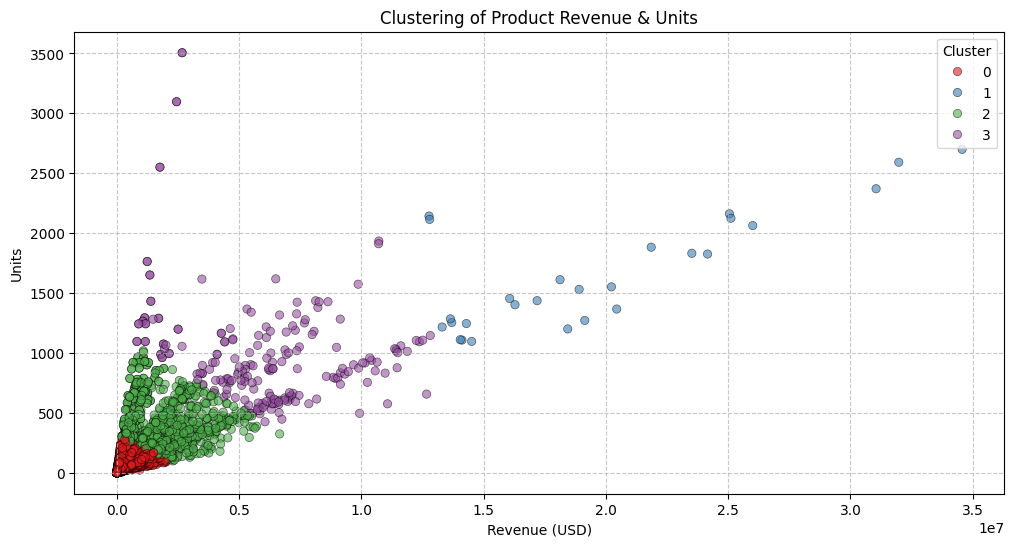

In [110]:
# Nhóm dữ liệu theo ProductID và Year để tổng hợp Revenue và Profit Margin
df_kmeans = df.groupby(["ProductID", "Year"], as_index=False).agg({
    "Revenue": "sum",  # Tổng doanh thu theo năm
    "Units": "sum"      # Tổng giá vốn theo năm
}).dropna()



# Chuẩn hóa dữ liệu để phân cụm
scaler = StandardScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans[["Revenue", "Units"]])

# Xác định số cụm k tối ưu bằng phương pháp Elbow
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_kmeans_scaled)
    wcss.append(kmeans.inertia_)


# Áp dụng K-Means với k tối ưu (giả sử k=4 dựa trên phân tích Elbow)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_kmeans["Cluster"] = kmeans_final.fit_predict(df_kmeans_scaled)

# Vẽ biểu đồ phân cụm trên mặt phẳng Revenue - Profit Margin
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_kmeans, x="Revenue", y="Units", hue="Cluster", palette="Set1", alpha=0.6, edgecolor="k")
plt.xlabel("Revenue (USD)")
plt.ylabel("Units")
plt.title(f"Clustering of Product Revenue & Units")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Nhận xét

##### 🔍 1️⃣ Phân bố của các cụm:
✔ Cluster 0 (Màu đỏ - Doanh thu thấp, số lượng bán thấp):

- Nhóm này tập trung gần gốc tọa độ, có doanh thu rất thấp và số lượng bán cũng thấp.
- Đây có thể là các sản phẩm bán chậm hoặc ít phổ biến, cần xem xét cải tiến hoặc loại bỏ.

✔ Cluster 1 (Màu xanh dương - Doanh thu cao, số lượng bán cao):

- Sản phẩm trong nhóm này có doanh thu và số lượng bán rất cao.
- Đây có thể là các sản phẩm bán chạy nhất, đóng vai trò quan trọng trong tổng doanh thu.

✔ Cluster 2 (Màu xanh lá - Số lượng bán cao nhưng doanh thu thấp):

- Những sản phẩm có số lượng bán cao nhưng doanh thu không cao. Điều này có thể xảy ra nếu sản phẩm có giá bán thấp hoặc biên lợi nhuận thấp.
- Cần xem xét tăng giá hoặc tối ưu chi phí để cải thiện lợi nhuận.

✔ Cluster 3 (Màu tím - Trung gian, doanh thu trung bình, số lượng bán trung bình):

- Nhóm này có doanh thu và số lượng bán ở mức trung bình.
- Có thể là sản phẩm tiềm năng, nếu cải thiện marketing hoặc chiến lược giá có thể thúc đẩy doanh số.

 ##### 2️⃣ Chiến lược kinh doanh gợi ý

✔ Đối với sản phẩm trong Cluster 0 (màu đỏ - Doanh thu & Số lượng bán thấp)

- Loại bỏ các sản phẩm không sinh lời hoặc cải thiện thiết kế & tiếp thị.

- Kiểm tra lại giá cả và kênh phân phối để tăng sự hấp dẫn.

✔ Đối với sản phẩm trong Cluster 1 (màu xanh dương - Bán chạy nhất)

- Tăng cường sản xuất, quảng cáo và mở rộng kênh bán hàng.

- Cân nhắc tối ưu giá bán để cải thiện biên lợi nhuận.

✔ Đối với sản phẩm trong Cluster 2 (màu xanh lá - Số lượng bán cao nhưng doanh thu thấp)

- Xem xét điều chỉnh giá bán để tối đa hóa doanh thu.

- Đàm phán chi phí sản xuất để cải thiện lợi nhuận.

✔ Đối với sản phẩm trong Cluster 3 (màu tím - Tiềm năng phát triển)

- Thử nghiệm chiến lược quảng cáo & ưu đãi để tăng doanh số.

- Xác định sản phẩm nào có khả năng trở thành best-seller trong tương lai.

## 2.8 Cân bằng giữa Doanh thu và Số lượng bán ra

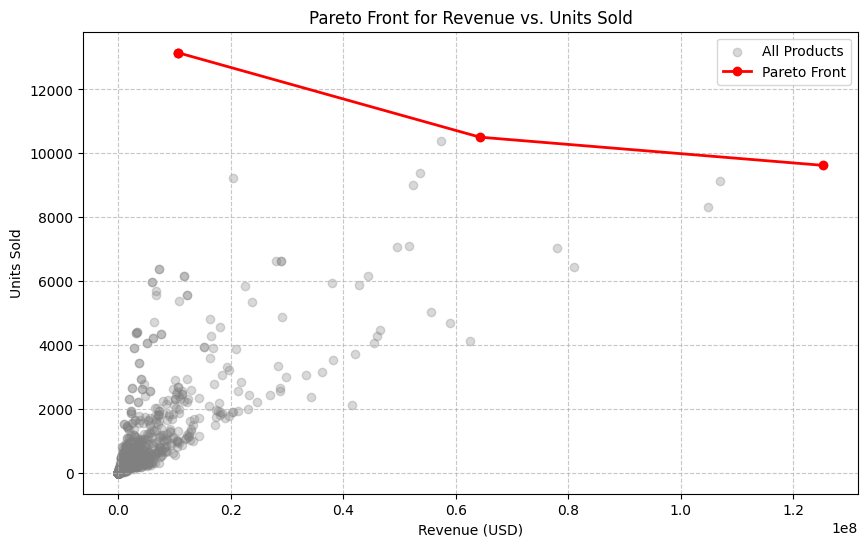

In [54]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Simulate dataset (since previous data was lost)
np.random.seed(42)

# Giả sử df đã được load trước đó
# Để tăng tốc, ta sẽ lấy một mẫu nhỏ thay vì toàn bộ dữ liệu
sample_size = len(df)  # Lấy tối đa 5000 dòng để tăng tốc xử lý

# Lọc dữ liệu chỉ chứa các cột cần thiết và loại bỏ giá trị NaN
df_pareto = df[["ProductID", "Revenue", "Units"]].dropna()

# Nhóm dữ liệu theo ProductID để xử lý trùng lặp
df_pareto = df_pareto.groupby("ProductID").agg({
    "Revenue": "sum",  # Tổng doanh thu của mỗi sản phẩm
    "Units": "sum"  # Tổng số lượng bán ra
}).reset_index()



# Compute Pareto Front using Convex Hull approach
points = df_pareto[["Revenue", "Units"]].values
pareto_mask = np.ones(points.shape[0], dtype=bool)

for i, point in enumerate(points):
    pareto_mask[i] = np.all(np.any(points <= point, axis=1))

pareto_front = points[pareto_mask]

# Sort Pareto front for visualization
pareto_front = pareto_front[np.argsort(pareto_front[:, 0])]

# Plot Pareto Front
plt.figure(figsize=(10, 6))
plt.scatter(df_pareto["Revenue"], df_pareto["Units"], color="gray", alpha=0.3, label="All Products")
plt.plot(pareto_front[:, 0], pareto_front[:, 1], color="red", linewidth=2, label="Pareto Front", marker="o")

# Labels and title
plt.xlabel("Revenue (USD)")
plt.ylabel("Units Sold")
plt.title("Pareto Front for Revenue vs. Units Sold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()




### Nhận xét:

- Ở vùng số lượng bán rất cao, doanh thu có thể không quá cao (gợi ý sản phẩm có giá rẻ nhưng bán chạy).

- Ở vùng doanh thu cao nhất, số lượng bán giảm dần, cho thấy sản phẩm có giá trị cao hơn nhưng lượng tiêu thụ ít hơn.

⚠ Điểm đáng chú ý:
- Những sản phẩm có số lượng bán cao nhất không phải là sản phẩm có doanh thu cao nhất.
- Có thể là do chiến lược giá thấp để tăng khối lượng bán, nhưng biên lợi nhuận có thể bị ảnh hưởng.
- Sản phẩm ngoài Pareto Front chưa tối ưu
- Nhiều sản phẩm có doanh thu cao nhưng số lượng bán ít, có thể là hàng cao cấp.
- Nhiều sản phẩm có số lượng bán nhiều nhưng doanh thu thấp, có thể là hàng phổ thông, giá rẻ.



##### Chiến lược tối ưu hóa danh mục sản phẩm
✅ Nhóm sản phẩm có doanh thu cao nhưng số lượng bán thấp

- Tăng cường quảng bá & tiếp thị để mở rộng thị phần.
- Xem xét điều chỉnh giá để kích thích nhu cầu mà vẫn giữ lợi nhuận tốt.
- Nghiên cứu khách hàng tiềm năng, liệu có thể mở rộng phân khúc không?

✅ Nhóm sản phẩm có số lượng bán cao nhưng doanh thu trung bình

- Cải thiện chi phí sản xuất để nâng cao lợi nhuận biên.
- Thử nghiệm tăng giá nhẹ, kiểm tra độ nhạy cảm của khách hàng.
- Mở rộng phân phối, ví dụ: đẩy mạnh bán hàng online.

## 2.9 Cân bằng giữa Doanh thu và Lợi nhuận biên

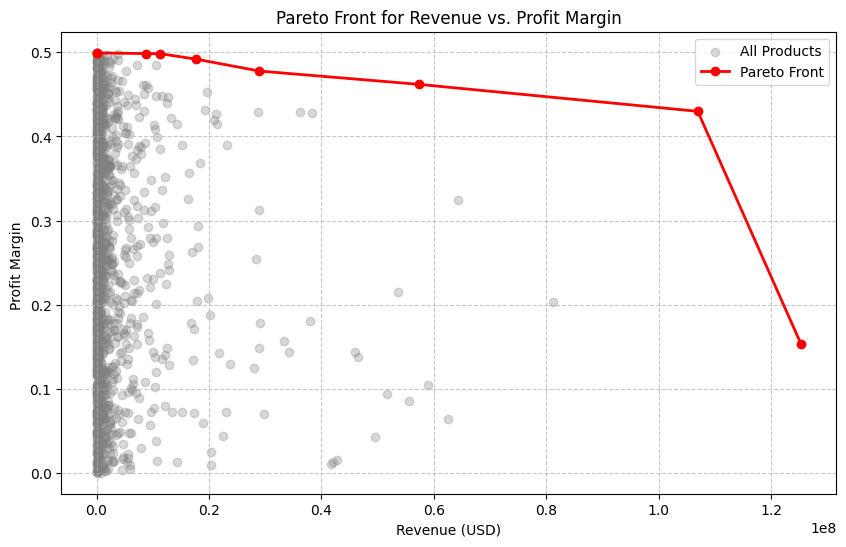

In [55]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Simulate dataset (since previous data was lost)
np.random.seed(42)

# Xác định số lượng mẫu ngẫu nhiên để tối ưu tốc độ xử lý
# Xác định số lượng mẫu tối ưu để giảm thời gian chạy
sample_size = len(df)  # Lấy tối đa 5000 dòng để tăng tốc xử lý

# Lọc dữ liệu chỉ chứa các cột cần thiết và loại bỏ giá trị NaN
df_pareto = df[["ProductID", "Revenue", "COGS"]].dropna()

# Nhóm dữ liệu theo ProductID để xử lý trùng lặp
df_pareto = df_pareto.groupby("ProductID").agg({
    "Revenue": "sum",  # Tổng doanh thu của mỗi sản phẩm
    "COGS": "sum"  # Tổng vốn
}).reset_index()

# Tính toán Profit Margin
df_pareto["Profit_Margin"] = (df_pareto["Revenue"] - df_pareto["COGS"]) / df_pareto["Revenue"]



# Loại bỏ các giá trị không hợp lệ (nếu có)
df_pareto = df_pareto.dropna(subset=["Profit_Margin"])
df_pareto = df_pareto[df_pareto["Profit_Margin"] >= 0]  # Chỉ giữ lại các sản phẩm có lợi nhuận dương



# Compute Pareto Front using Convex Hull approach
points = df_pareto[["Revenue", "Profit_Margin"]].values
pareto_mask = np.ones(points.shape[0], dtype=bool)

for i, point in enumerate(points):
    pareto_mask[i] = np.all(np.any(points <= point, axis=1))

pareto_front = points[pareto_mask]

# Sort Pareto front for visualization
pareto_front = pareto_front[np.argsort(pareto_front[:, 0])]

# Plot Pareto Front
plt.figure(figsize=(10, 6))
plt.scatter(df_pareto["Revenue"], df_pareto["Profit_Margin"], color="gray", alpha=0.3, label="All Products")
plt.plot(pareto_front[:, 0], pareto_front[:, 1], color="red", linewidth=2, label="Pareto Front", marker="o")

# Labels and title
plt.xlabel("Revenue (USD)")
plt.ylabel("Profit Margin ")
plt.title("Pareto Front for Revenue vs. Profit Margin")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()





### Nhận xét:

- Ở vùng doanh thu thấp, biên lợi nhuận khá cao (~50%).
- Ở vùng doanh thu cao, biên lợi nhuận giảm dần, cho thấy sự đánh đổi giữa tăng doanh thu và tối ưu lợi nhuận.

⚠ Vấn đề cần lưu ý

- Có sự sụt giảm mạnh về biên lợi nhuận khi doanh thu đạt mức cao nhất (điểm cuối của đường Pareto Front).
- Điều này có thể xảy ra do các sản phẩm có doanh thu lớn thường phải giảm giá hoặc có chi phí sản xuất cao hơn. Có thể đây là sản phẩm có sức mua lớn nhưng lợi nhuận biên thấp.
- Phần lớn sản phẩm khác nằm bên trái Pareto Front, tức là chưa đạt tối ưu.

- Nhiều sản phẩm có doanh thu thấp nhưng lợi nhuận biên tốt, có thể là sản phẩm ngách hoặc cao cấp.
- Ngược lại, nhiều sản phẩm có doanh thu cao nhưng lợi nhuận thấp, có thể là do chiến lược giá hoặc chi phí sản xuất cao.

##### Chiến lược tối ưu hóa danh mục sản phẩm
✅ Nhóm sản phẩm có doanh thu cao nhưng lợi nhuận thấp

- Xem xét tối ưu chi phí sản xuất để cải thiện lợi nhuận biên.
- Nâng giá nhẹ nếu thị trường chấp nhận.
- Tìm kiếm đối tác cung ứng tốt hơn để giảm giá vốn hàng bán (COGS).

✅ Nhóm sản phẩm có lợi nhuận cao nhưng doanh thu thấp

- Tăng đầu tư marketing để mở rộng thị phần.
- Khuyến mãi hoặc giảm giá nhẹ để kích thích nhu cầu.
- Xây dựng chiến lược mở rộng kênh bán hàng (online, offline, đại lý).

✅ Tận dụng Pareto Front để đưa ra quyết định

- Duy trì và mở rộng sản phẩm nằm trên Pareto Front.
- Dịch chuyển các sản phẩm chưa tối ưu lên Pareto Front bằng cách cải thiện cả Revenue và Profit Margin.
- Loại bỏ hoặc thay đổi chiến lược với các sản phẩm không có lợi thế.

## 2.10 So sánh các thuật toán Cluster Sản phẩm dựa trên Doanh thu

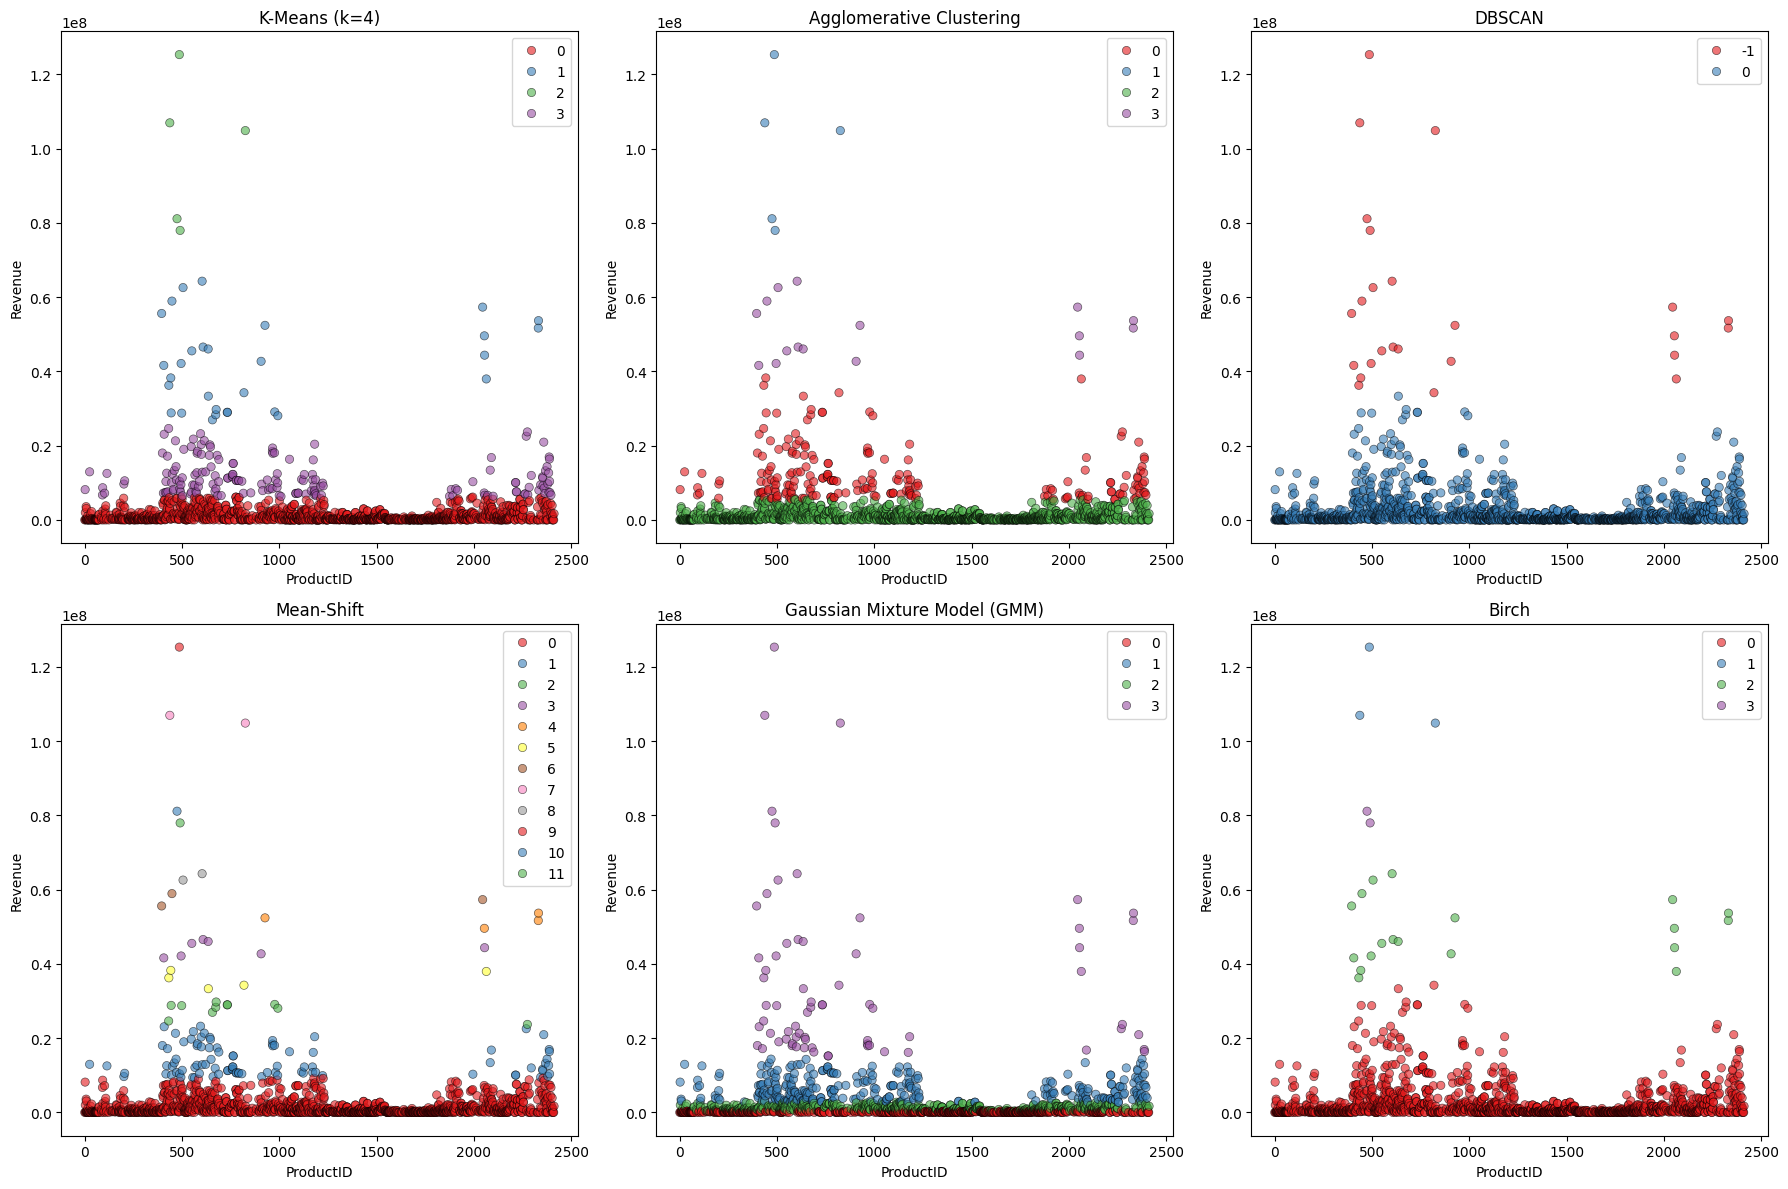

In [28]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, Birch
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture



from dataflow import df_train, df_test, df_geography, df_product

# Kết nối dữ liệu
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

# Nhóm dữ liệu theo ProductID để tránh trùng lặp
df_cluster = df.groupby("ProductID", as_index=False).agg({
    "Revenue": "sum"  # Tổng doanh thu của từng sản phẩm
}).dropna()

# Chuẩn hóa dữ liệu để cải thiện clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[["Revenue"]])

# Danh sách thuật toán clustering cần thử nghiệm
cluster_algorithms = {
    "K-Means (k=4)": KMeans(n_clusters=4, random_state=42, n_init=10),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=4),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=10),
    "Mean-Shift": MeanShift(),
    "Gaussian Mixture Model (GMM)": GaussianMixture(n_components=4, random_state=42),
    "Birch": Birch(n_clusters=4)
}

# Thiết lập subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Lặp qua từng thuật toán và vẽ biểu đồ
for i, (name, algorithm) in enumerate(cluster_algorithms.items()):
    try:
        # Áp dụng thuật toán clustering
        labels = algorithm.fit_predict(df_scaled)

        # Kiểm tra nếu thuật toán không phân cụm hợp lệ (tất cả cùng một cluster)
        if len(np.unique(labels)) <= 1:
            axes[i].text(0.5, 0.5, "No valid clusters", fontsize=12, ha="center")
            axes[i].set_title(name)
            axes[i].axis("off")
            continue

        # Vẽ scatter plot
        sns.scatterplot(x=df_cluster["ProductID"], y=df_cluster["Revenue"], hue=labels, 
                        palette="Set1", alpha=0.6, ax=axes[i], edgecolor="k")
        
        # Tạo tiêu đề
        axes[i].set_title(name)
        axes[i].set_xlabel("ProductID")
        axes[i].set_ylabel("Revenue")

    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error: {str(e)}", fontsize=12, ha="center")
        axes[i].set_title(name)
        axes[i].axis("off")

# Xóa subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


### 📈  Phân tích từng thuật toán

✅ 1️⃣ K-Means (k=4)
- Chia dữ liệu thành 4 cụm rõ ràng.
- Cụm chính (màu đỏ) tập trung ở mức doanh thu thấp, các cụm còn lại phân biệt tốt doanh thu cao hơn.
- Nhược điểm: Có thể bị ảnh hưởng bởi giá trị ngoại lai, dẫn đến phân cụm không chính xác với doanh thu cao.

✅ 2️⃣ Agglomerative Clustering
- Nhóm cụm rất tương đồng với K-Means.
- Có xu hướng tạo cụm chặt chẽ hơn, có thể phù hợp với dữ liệu có mối quan hệ phân cấp.
- Nhược điểm: Tốn nhiều tài nguyên tính toán khi số lượng sản phẩm lớn.

✅ 3️⃣ DBSCAN
- Chỉ tìm thấy 2 cụm chính, một nhóm với doanh thu rất thấp và một nhóm với doanh thu cao.
- Xác định tốt outliers, nhưng không phù hợp khi muốn phân cụm chi tiết.
- Nhược điểm: Không tạo ra nhiều cụm, có thể bỏ sót các đặc điểm quan trọng trong dữ liệu.

✅ 4️⃣ Mean-Shift
- Tạo 11 cụm, tức là phát hiện nhiều nhóm khác nhau.
- Phù hợp khi dữ liệu có nhiều mật độ khác nhau.
- Nhược điểm: Có thể quá phân cụm, dẫn đến việc khó diễn giải các nhóm.

✅ 5️⃣ Gaussian Mixture Model (GMM)
- Giúp làm mềm ranh giới giữa các cụm so với K-Means.
- Hiệu quả trong việc xử lý dữ liệu có sự chồng lấn giữa các cụm.
- Nhược điểm: Có thể bị ảnh hưởng nếu dữ liệu không có dạng phân phối Gaussian.

✅ 6️⃣ BIRCH
- Tương tự K-Means nhưng hiệu quả hơn với dữ liệu lớn.
- Có xu hướng tạo cụm đồng đều, không bị tác động mạnh bởi giá trị ngoại lai.
- Nhược điểm: Không linh hoạt khi dữ liệu thay đổi nhiều về phân bố.